<a href="https://colab.research.google.com/github/Venkykatariki/Medical-Insurance-Prediction-by-ML/blob/main/Medical_Insurance_prediction_by_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data collection and Analysis

In [ ]:
# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('/content/Medical_insurance.csv')

In [ ]:
# first 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [ ]:
# getting some informations about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features :
1. Age
2. Sex
3. Region


In [ ]:
# checking for missing values
insurance_dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
# statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


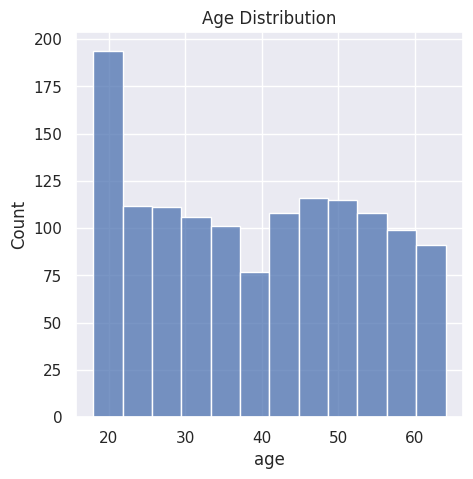

In [ ]:
# distribution of age value
sns.set()
plt.figure(figsize=(5,5))
sns.histplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

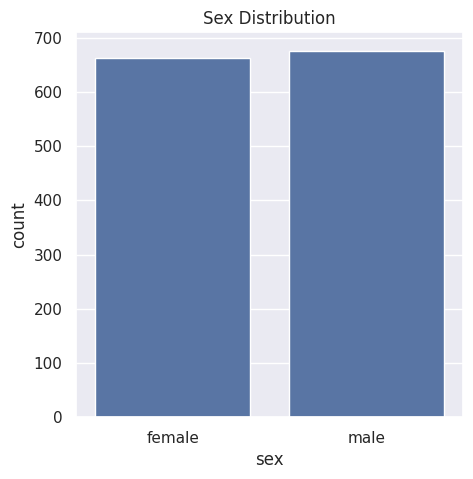

In [ ]:
# Gender column
plt.figure(figsize=(5,5))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
insurance_dataset['sex'].value_counts()

,count
sex,
male,676
female,662


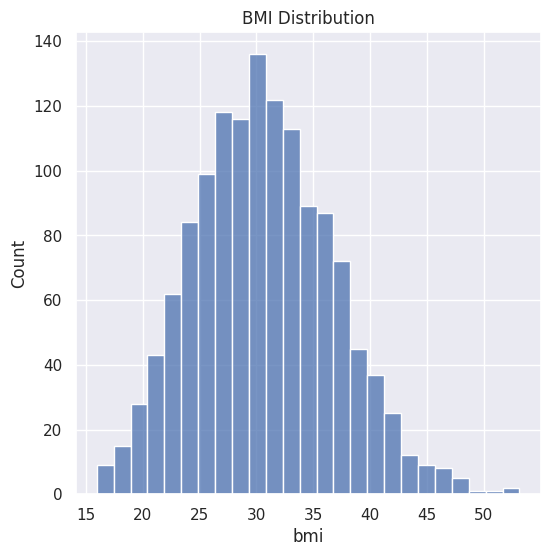

In [ ]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI Range --> 18.5 to 24.9

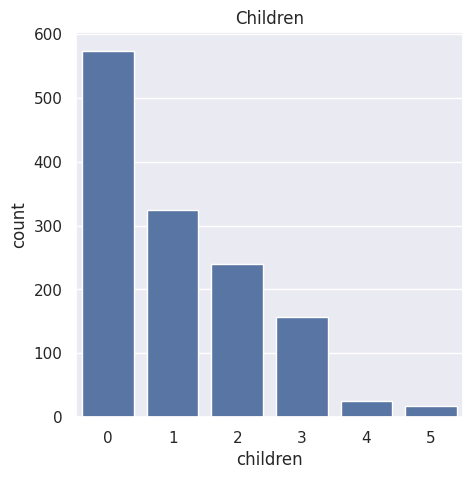

In [ ]:
# children column
plt.figure(figsize=(5,5))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

In [ ]:
insurance_dataset['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


In [ ]:
insurance_dataset['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


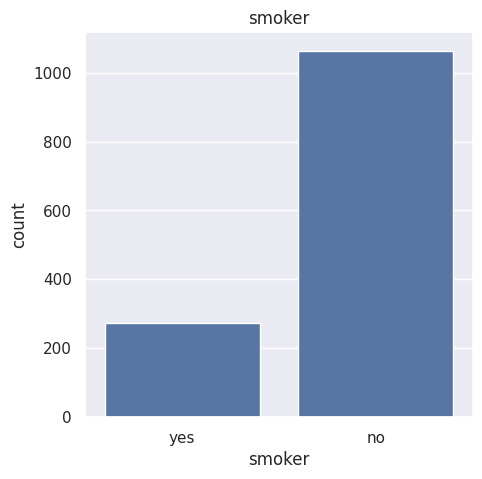

In [ ]:
# smoker column
plt.figure(figsize=(5,5))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [ ]:
insurance_dataset['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


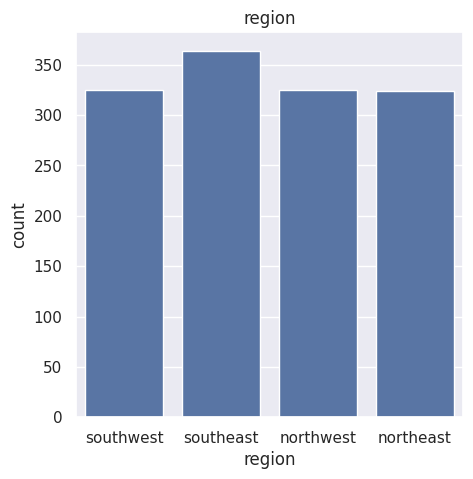

In [ ]:
# region column
plt.figure(figsize=(5,5))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

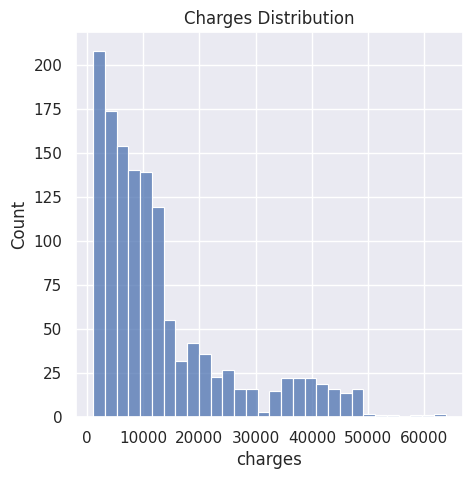

In [ ]:
# distribution of charges value
plt.figure(figsize=(5,5))
sns.histplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

Splitting the Features and Target

In [ ]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']
print(X)
print(Y)

      age     sex     bmi  children smoker     region
0      19  female  27.900         0    yes  southwest
1      18    male  33.770         1     no  southeast
2      28    male  33.000         3     no  southeast
3      33    male  22.705         0     no  northwest
4      32    male  28.880         0     no  northwest
...   ...     ...     ...       ...    ...        ...
1333   50    male  30.970         3     no  northwest
1334   18  female  31.920         0     no  northeast
1335   18  female  36.850         0     no  southeast
1336   21  female  25.800         0     no  southwest
1337   61  female  29.070         0    yes  northwest

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


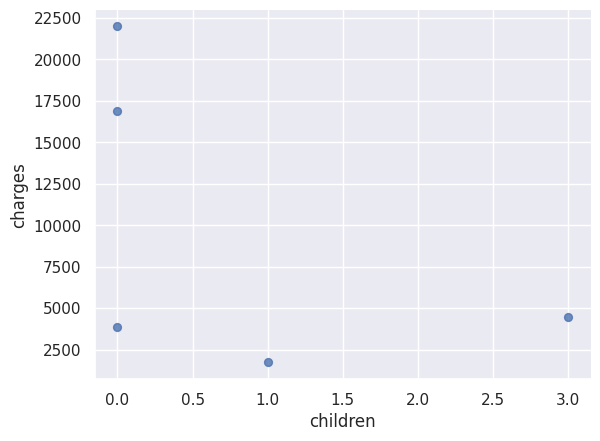

In [ ]:
from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='children', y='charges', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

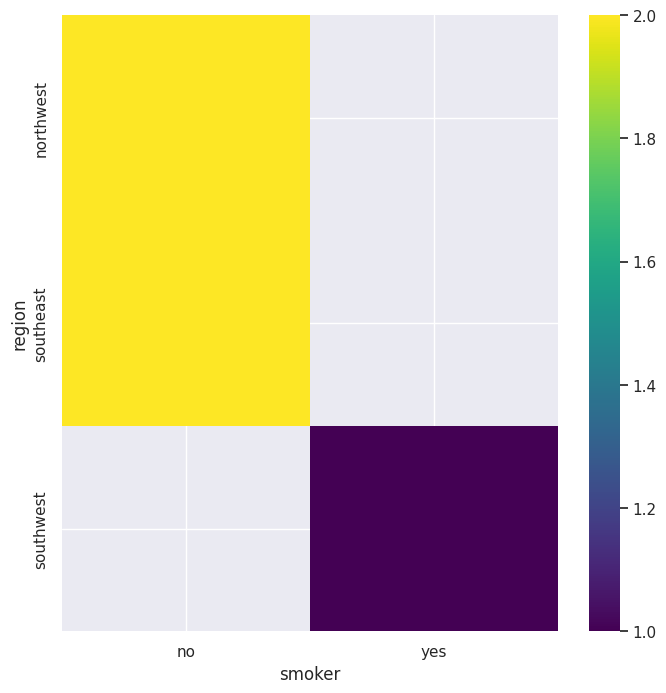

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['region'].value_counts()
    for x_label, grp in _df_15.groupby('smoker')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('smoker')
_ = plt.ylabel('region')

Splitting the data into Training data & Testing Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)
